In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
%matplotlib inline
import os

In [2]:
data = pd.read_csv('C:/Users/Nikhil_Chamle/Desktop/Debt_collection_project/DataFile1.csv')

In [3]:
df = data.copy()

In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  object 
 4   DebtLoadPrincipal           406423 non-null  object 
 5   BalanceAtDebtLoad           406423 non-null  object 
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   IsStatBarred                406423 non-null  object 
 10  ClosureReason               9030 non-null    object 
 11  InBankruptcy                406423 non-null  object 
 12  AccountInsolvencyType       285 non-null     object 
 13  CustomerInsolv

In [6]:
df.columns

Index(['EntityID', 'OriginalCreditor[Redacted]', 'AccountID', 'CurrentBalance',
       'DebtLoadPrincipal', 'BalanceAtDebtLoad', 'PurchasePrice',
       'ProductOrDebtType', 'CollectionStatus', 'IsStatBarred',
       'ClosureReason', 'InBankruptcy', 'AccountInsolvencyType',
       'CustomerInsolvencyType', 'IsLegal', 'LastPaymentAmount',
       'LastPaymentMethod', 'NumLiableParties', 'CustomerAge', 'NumPhones',
       'NumEmails', 'NumAddresses', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [7]:
# Dropping columns

df = df.drop(['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis = 1 )

In [8]:
# checking null values

df.isnull().sum()/len(df) * 100

EntityID                       0.000000
OriginalCreditor[Redacted]     0.000000
AccountID                      0.000000
CurrentBalance                 0.000000
DebtLoadPrincipal              0.000000
BalanceAtDebtLoad              0.000000
PurchasePrice                  0.662364
ProductOrDebtType              0.000000
CollectionStatus               0.000000
IsStatBarred                   0.000000
ClosureReason                 97.778177
InBankruptcy                   0.000000
AccountInsolvencyType         99.929876
CustomerInsolvencyType        97.900955
IsLegal                        0.000000
LastPaymentAmount             74.416556
LastPaymentMethod             74.416556
NumLiableParties               0.030018
CustomerAge                    7.254019
NumPhones                      0.000000
NumEmails                      0.000000
NumAddresses                   0.000000
dtype: float64

In [9]:
# checking duplicates

df.duplicated().sum()

0

In [10]:
#dropping columns with max null values

df = df.drop(['ClosureReason', 'AccountInsolvencyType', 'CustomerInsolvencyType', 'LastPaymentMethod', 'LastPaymentAmount'], axis = 1 )

In [11]:
# Converting columns to float
columns_to_convert = ['CurrentBalance', 'DebtLoadPrincipal', 'BalanceAtDebtLoad']
 
for column in columns_to_convert:
    df[column] = df[column].str.replace(',', '').astype(float)

In [12]:
df.isnull().sum()/len(df) * 100

EntityID                      0.000000
OriginalCreditor[Redacted]    0.000000
AccountID                     0.000000
CurrentBalance                0.000000
DebtLoadPrincipal             0.000000
BalanceAtDebtLoad             0.000000
PurchasePrice                 0.662364
ProductOrDebtType             0.000000
CollectionStatus              0.000000
IsStatBarred                  0.000000
InBankruptcy                  0.000000
IsLegal                       0.000000
NumLiableParties              0.030018
CustomerAge                   7.254019
NumPhones                     0.000000
NumEmails                     0.000000
NumAddresses                  0.000000
dtype: float64

In [13]:
df.describe()

,EntityID,AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
count,4.064230e+05,4.064230e+05,406423.000000,406423.000000,406423.000000,403731.000000,406301.000000,376941.000000,406423.000000,406423.000000,406423.000000
mean,3.970443e+07,3.954380e+08,1301.866266,1539.010928,1600.933847,5.618606,1.017145,45.728061,0.435652,0.208113,0.847354
std,4.698070e+07,4.654769e+08,4030.513710,4416.229311,4531.889319,5.441934,0.132866,12.950395,0.714852,0.434321,0.459690
min,1.600000e+02,3.677000e+03,-7717.200000,0.000000,0.000000,0.190000,1.000000,-41.000000,0.000000,0.000000,0.000000
25%,3.010600e+06,3.023088e+07,85.330000,246.970000,249.875000,3.070000,1.000000,36.000000,0.000000,0.000000,1.000000
50%,3.010949e+06,3.045075e+07,457.510000,619.000000,630.740000,4.220000,1.000000,44.000000,0.000000,0.000000,1.000000
75%,9.990131e+07,9.901891e+08,1159.365000,1393.780000,1433.755000,6.590000,1.000000,54.000000,1.000000,0.000000,1.000000
max,9.990159e+07,9.904958e+08,441681.520000,844343.000000,844343.000000,52.180000,4.000000,133.000000,8.000000,5.000000,7.000000


In [14]:
df['CustomerAge'] = df['CustomerAge'].abs()

In [15]:
# imputing null values in age column

mean_age = df['CustomerAge'].mean()
df['CustomerAge'].fillna(mean_age, inplace=True)

In [16]:
# dropping null rows

df.dropna(inplace=True)

In [17]:
df = df.drop(['EntityID', 'AccountID', 'OriginalCreditor[Redacted]'], axis = 1 )

In [18]:
df

,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,0.00,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,N,Y,1.0,53.000000,0,0,1
1,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,Y,N,N,1.0,45.730273,0,0,1
2,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,N,N,N,1.0,45.730273,1,0,1
3,8279.50,8279.50,8279.50,4.22,Other,PASSIVE,Y,N,N,1.0,45.730273,1,0,1
4,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,Y,N,Y,1.0,46.000000,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406418,448.20,448.20,448.20,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,36.000000,1,1,1
406419,1678.37,1678.37,1678.37,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,37.000000,0,1,1
406420,3512.60,3512.60,3512.60,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,71.000000,1,1,1
406421,4477.31,4477.31,4477.31,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,38.000000,1,1,1


In [19]:
# seperating columns on basis of dataypes and putting in a list

obj1 = []
int1 = []
flo1 = []

for i in df.columns:
    if df[i].dtypes == 'object':
        obj1.append(i)
    elif df[i].dtypes == 'int64':
        int1.append(i)
    elif df[i].dtypes == 'float':
        flo1.append(i)

In [20]:
# checking uniques values for features

for idx, column in enumerate(df.columns):
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Column '{column}' (Index {idx}):")
        
        # Drop NaN values and calculate value counts
        value_counts = df[column].dropna().value_counts().to_dict()
        
        # Calculate the total values
        total_values = sum(value_counts.values())
        
        # Check if the number of unique values is less than or equal to 15
        if len(unique_values) <= 15:
            # Convert value counts dictionary to a list of lists
            value_counts_table = [[idx, value, count, f"{count / total_values:.2%}"] for value, count in value_counts.items()]
            
            # Print the table using tabulate
            print(tabulate(value_counts_table, headers=['Index', 'Value', 'Count', 'Percentage']))
            print(f"Total Values: {total_values}")
        else:
            print(f"Too many unique values ({len(unique_values)}). Skipping...")
        print()

Column 'ProductOrDebtType' (Index 4):
  Index  Value                      Count  Percentage
-------  -----------------------  -------  ------------
      4  Utilities/Telco - Other   212110  52.55%
      4  Other                      81528  20.20%
      4  Finance Company - Other    48665  12.06%
      4  Store Cards                17691  4.38%
      4  Credit Cards               16884  4.18%
      4  Bank - Other               13022  3.23%
      4  Residential Electricity     7688  1.90%
      4  Personal Loans              4304  1.07%
      4  Loans                       1250  0.31%
      4  Hire Purchase                469  0.12%
Total Values: 403611

Column 'CollectionStatus' (Index 5):
  Index  Value                  Count  Percentage
-------  -------------------  -------  ------------
      5  ACTIVE                169265  41.94%
      5  PASSIVE               136652  33.86%
      5  PAID_IN_FULL           68638  17.01%
      5  CLOSED                 13348  3.31%
      5  CANCEL

## EDA: Part 1

### 1. IsStatBarred

Y    282824
N    120787
Name: IsStatBarred, dtype: int64


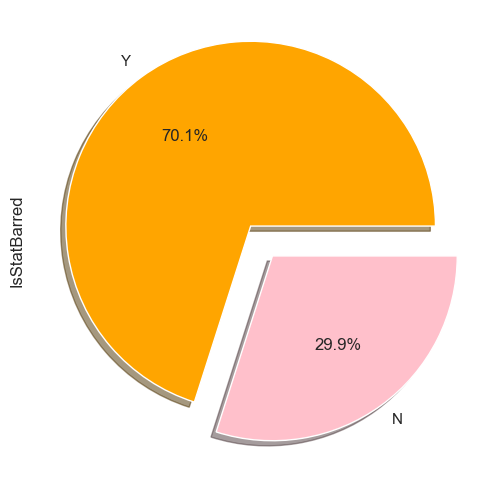

In [21]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid')
df['IsStatBarred'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['Orange','pink'])
print(df['IsStatBarred'].value_counts())

In [22]:
df

,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,0.00,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,N,Y,1.0,53.000000,0,0,1
1,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,Y,N,N,1.0,45.730273,0,0,1
2,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,N,N,N,1.0,45.730273,1,0,1
3,8279.50,8279.50,8279.50,4.22,Other,PASSIVE,Y,N,N,1.0,45.730273,1,0,1
4,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,Y,N,Y,1.0,46.000000,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406418,448.20,448.20,448.20,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,36.000000,1,1,1
406419,1678.37,1678.37,1678.37,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,37.000000,0,1,1
406420,3512.60,3512.60,3512.60,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,71.000000,1,1,1
406421,4477.31,4477.31,4477.31,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,38.000000,1,1,1


### 2. CurrentBalance  i.e  Debt to be collected

In [23]:
# renaming column

df.rename(columns={'CurrentBalance': 'Debt_Pending'}, inplace=True)

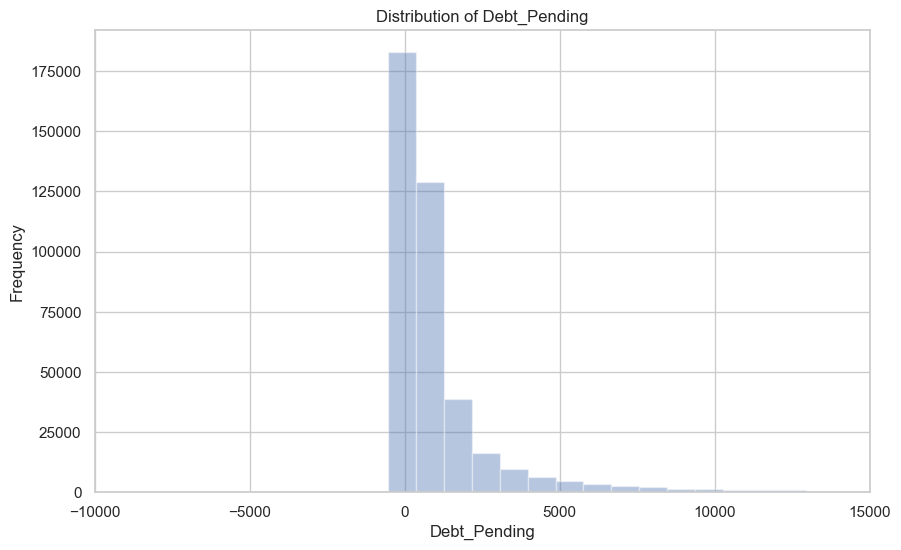

In [24]:
sns.set(style="whitegrid") 
plt.figure(figsize=(10, 6)) 
sns.distplot(df['Debt_Pending'], kde=False, bins=500)
plt.title("Distribution of Debt_Pending")
plt.xlabel("Debt_Pending")
plt.ylabel("Frequency")
plt.xlim(-10000, 15000)
plt.show()

### 3. DebtLoadPrincipal  i.e original debt on the account

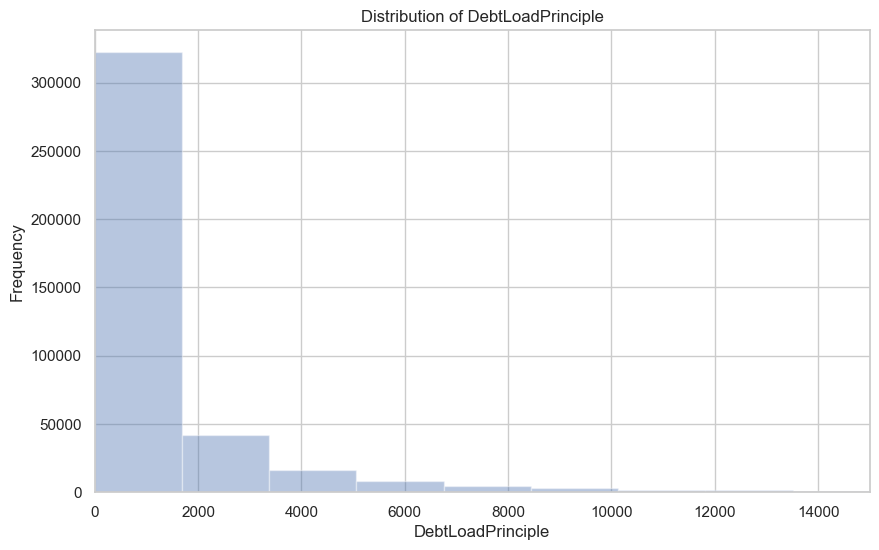

In [25]:
sns.set(style="whitegrid") 
plt.figure(figsize=(10, 6)) 
sns.distplot(df['DebtLoadPrincipal'], kde=False, bins=500)
plt.title("Distribution of DebtLoadPrinciple")
plt.xlabel("DebtLoadPrinciple")
plt.ylabel("Frequency")
plt.xlim(0, 15000)
plt.show()

### 4. BalanceAtDebtLoad , debt load is ration of total debt/ annual income

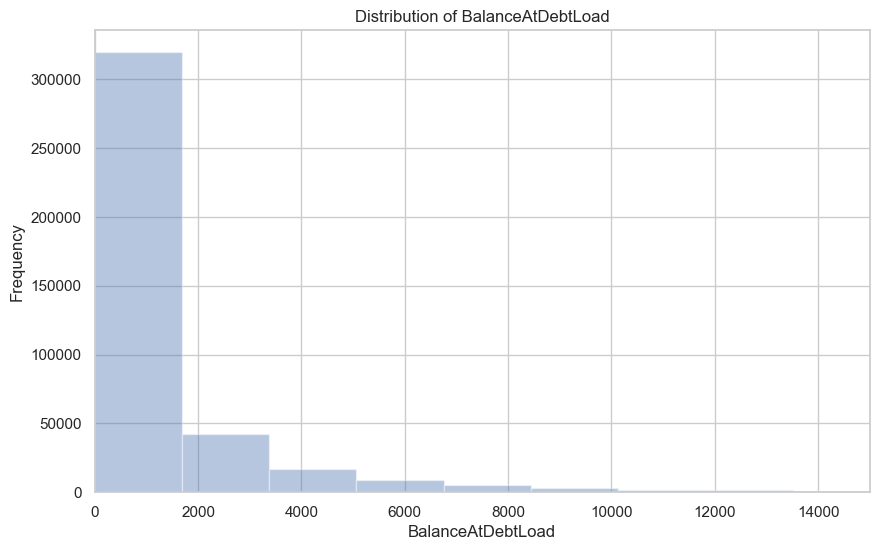

In [26]:
sns.set(style="whitegrid") 
plt.figure(figsize=(10, 6)) 
sns.distplot(df['BalanceAtDebtLoad'], kde=False, bins=500)
plt.title("Distribution of BalanceAtDebtLoad")
plt.xlabel("BalanceAtDebtLoad")
plt.ylabel("Frequency")
plt.xlim(0, 15000)
plt.show()

### 5. PurchasePrice

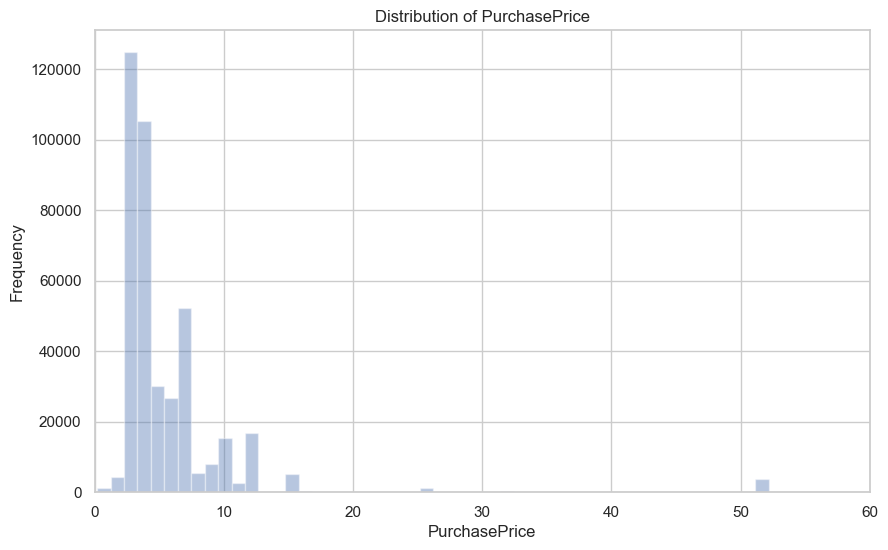

In [27]:
sns.set(style="whitegrid") 
plt.figure(figsize=(10, 6)) 
sns.distplot(df['PurchasePrice'], kde=False, bins=50)
plt.title("Distribution of PurchasePrice")
plt.xlabel("PurchasePrice")
plt.ylabel("Frequency")
plt.xlim(0, 60)
plt.show()

### 6. ProductOrDebtType

In [28]:
df['ProductOrDebtType'].value_counts(normalize=True) * 100

Utilities/Telco - Other    52.553077
Other                      20.199648
Finance Company - Other    12.057402
Store Cards                 4.383181
Credit Cards                4.183236
Bank - Other                3.226374
Residential Electricity     1.904804
Personal Loans              1.066373
Loans                       0.309704
Hire Purchase               0.116201
Name: ProductOrDebtType, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Utilities/Telco - Other'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Finance Company - Other'),
  Text(3, 0, 'Store Cards'),
  Text(4, 0, 'Credit Cards'),
  Text(5, 0, 'Bank - Other'),
  Text(6, 0, 'Residential Electricity'),
  Text(7, 0, 'Personal Loans'),
  Text(8, 0, 'Loans'),
  Text(9, 0, 'Hire Purchase')])

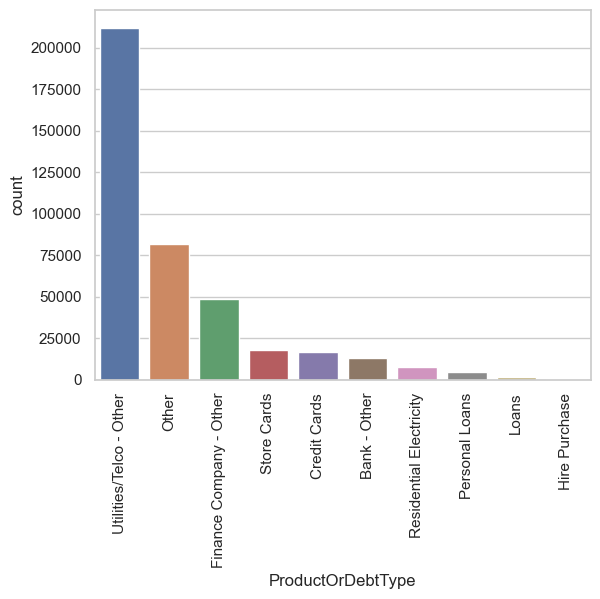

In [29]:
sns.countplot(data=df, x="ProductOrDebtType", order=df["ProductOrDebtType"].value_counts().index)
plt.xticks(rotation = 90)

### 7. CollectionStatus

In [30]:
df['CollectionStatus'].value_counts(normalize=True) * 100

ACTIVE                 41.937658
PASSIVE                33.857353
PAID_IN_FULL           17.005979
CLOSED                  3.307145
CANCELLED_WITHDRAWN     1.266071
UNDER_ARRANGEMENT       1.044818
SETTLED FOR LESS        1.036642
LEGAL                   0.377096
LEGAL_ARRANGEMENT       0.087213
NON_COLLECTION          0.058720
HOLDING                 0.014618
PENDING                 0.006690
Name: CollectionStatus, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'ACTIVE'),
  Text(1, 0, 'PASSIVE'),
  Text(2, 0, 'PAID_IN_FULL'),
  Text(3, 0, 'CLOSED'),
  Text(4, 0, 'CANCELLED_WITHDRAWN'),
  Text(5, 0, 'UNDER_ARRANGEMENT'),
  Text(6, 0, 'SETTLED FOR LESS'),
  Text(7, 0, 'LEGAL'),
  Text(8, 0, 'LEGAL_ARRANGEMENT'),
  Text(9, 0, 'NON_COLLECTION'),
  Text(10, 0, 'HOLDING'),
  Text(11, 0, 'PENDING')])

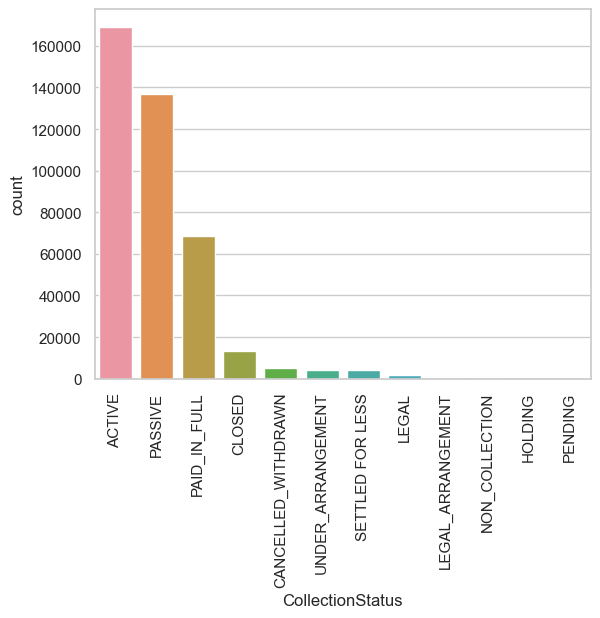

In [31]:
sns.countplot(data=df, x="CollectionStatus", order=df["CollectionStatus"].value_counts().index)
plt.xticks(rotation = 90)

### 8. InBankruptcy

In [32]:
df['InBankruptcy'].value_counts(normalize=True) * 100

N    97.991878
Y     2.008122
Name: InBankruptcy, dtype: float64

<Axes: xlabel='InBankruptcy', ylabel='count'>

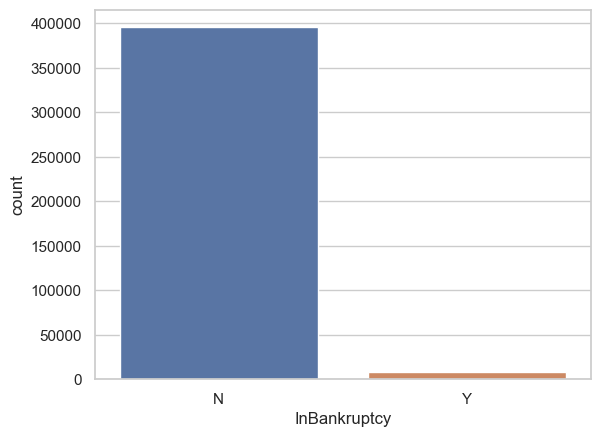

In [33]:
sns.countplot(data = df, x = 'InBankruptcy')

### 9. IsLegal

In [34]:
df['IsLegal'].value_counts(normalize=True) * 100

N    97.656159
Y     2.343841
Name: IsLegal, dtype: float64

<Axes: xlabel='IsLegal', ylabel='count'>

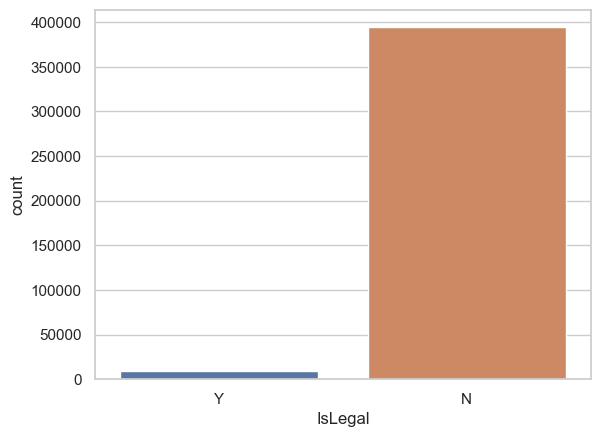

In [35]:
sns.countplot(data = df, x = 'IsLegal')

### 10. NumLiableParties

In [36]:
df['NumLiableParties'].value_counts(normalize=True) * 100

1.0    98.340234
2.0     1.621611
3.0     0.037164
4.0     0.000991
Name: NumLiableParties, dtype: float64

<Axes: xlabel='NumLiableParties', ylabel='count'>

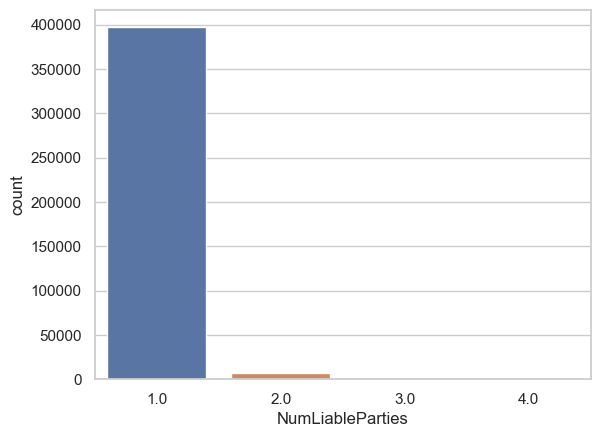

In [37]:
sns.countplot(data = df, x = 'NumLiableParties')

### 11. CustomerAge

In [38]:
df['CustomerAge'].min()

1.0

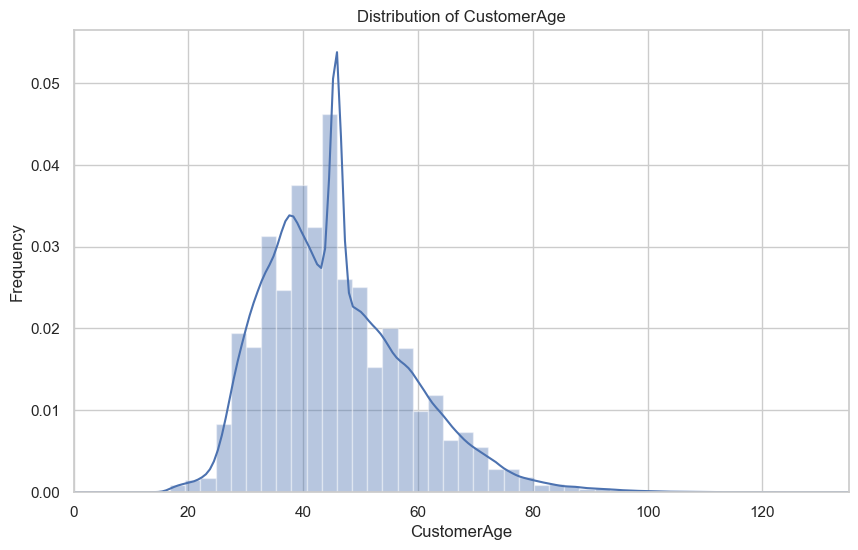

In [39]:
sns.set(style="whitegrid") 
plt.figure(figsize=(10, 6)) 
sns.distplot(df['CustomerAge'], kde=True, bins=50)
plt.title("Distribution of CustomerAge")
plt.xlabel("CustomerAge")
plt.ylabel("Frequency")
plt.xlim(0, 135)
plt.show()

### 12. NumPhones

In [40]:
df['NumPhones'].value_counts(normalize=True) * 100

0    67.469668
1    23.465911
2     7.358571
3     1.512100
4     0.156091
5     0.031466
6     0.005451
8     0.000496
7     0.000248
Name: NumPhones, dtype: float64

<Axes: xlabel='NumPhones', ylabel='count'>

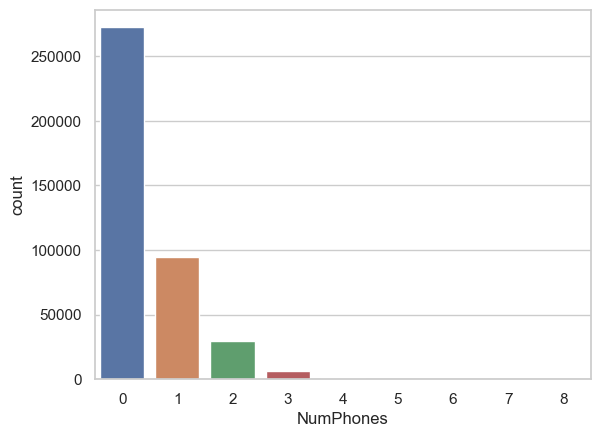

In [41]:
sns.countplot(data = df, x = 'NumPhones')

### 13. NumEmails

In [42]:
df['NumEmails'].value_counts(normalize=True) * 100

0    80.220559
1    18.751223
2     0.957357
3     0.063180
4     0.006690
5     0.000991
Name: NumEmails, dtype: float64

<Axes: xlabel='NumEmails', ylabel='count'>

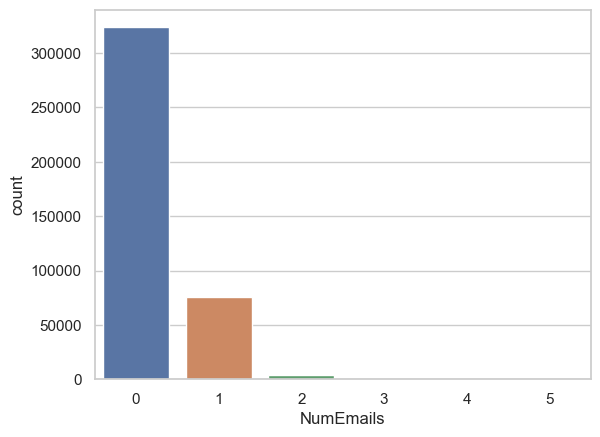

In [43]:
sns.countplot(data = df, x = 'NumEmails')

### 14. NumAddresses

In [44]:
df['NumAddresses'].value_counts(normalize=True) * 100

1    77.729051
0    18.981643
2     2.968700
3     0.278734
4     0.034439
5     0.005451
6     0.001734
7     0.000248
Name: NumAddresses, dtype: float64

<Axes: xlabel='NumAddresses', ylabel='count'>

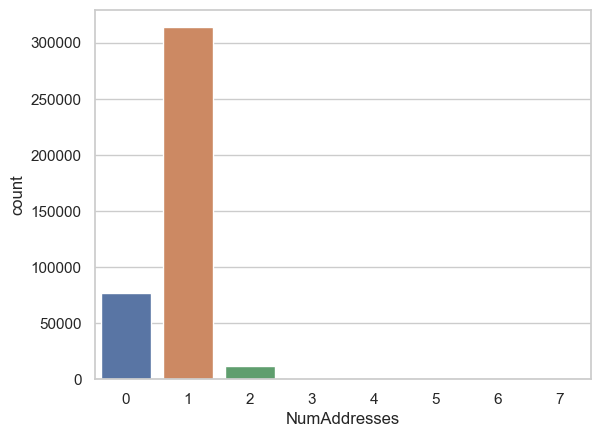

In [45]:
sns.countplot(data = df, x = 'NumAddresses')

## EDA: Part 2

### 15. Debt_Pending vs BalanceAtDebtLoad

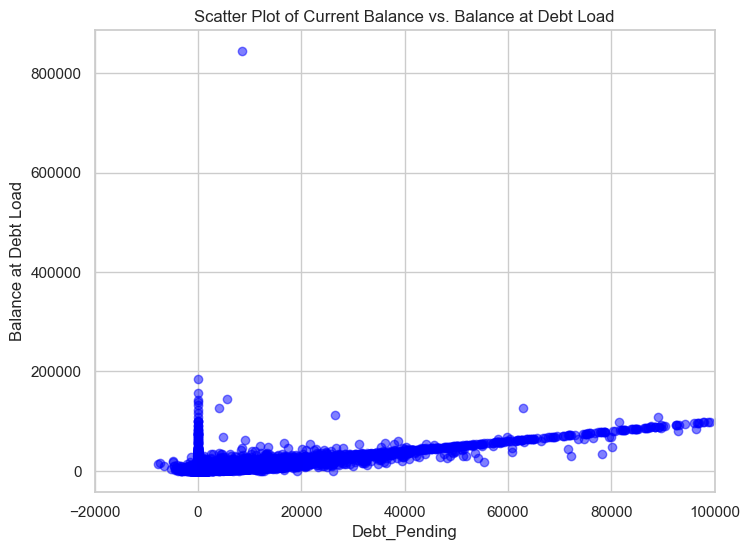

In [46]:
Debt_Pending = df['Debt_Pending']
BalanceAtDebtLoad = df['BalanceAtDebtLoad']
plt.figure(figsize=(8, 6))
plt.scatter(Debt_Pending, BalanceAtDebtLoad, c='blue', alpha=0.5)
plt.xlabel("Debt_Pending")
plt.ylabel("Balance at Debt Load")
plt.title("Scatter Plot of Current Balance vs. Balance at Debt Load")
plt.xlim(-20000, 100000)
plt.show()

### 16. Debt_Pending vs DebtLoadPrincipal

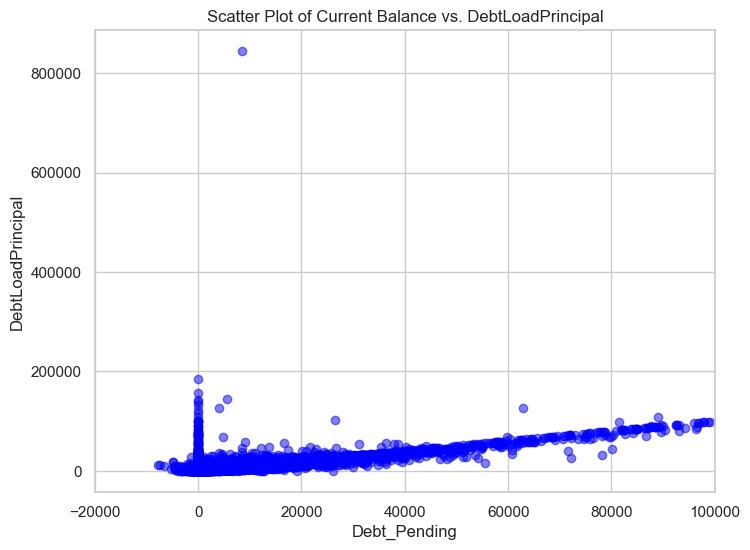

In [47]:
Debt_Pending = df['Debt_Pending']
Debt_Lprincipal = df['DebtLoadPrincipal']
plt.figure(figsize=(8, 6))
plt.scatter(Debt_Pending, Debt_Lprincipal, c='blue', alpha=0.5)
plt.xlabel("Debt_Pending")
plt.ylabel("DebtLoadPrincipal")
plt.title("Scatter Plot of Current Balance vs. DebtLoadPrincipal")
plt.xlim(-20000, 100000)
plt.show()

### 17. DebtLoadPrincipal vs BalanceAtDebtLoad

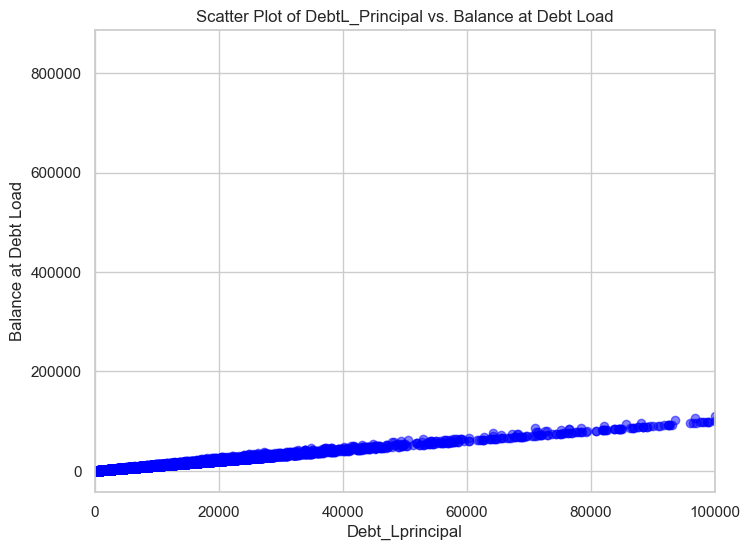

In [48]:
Debt_Lprincipal = df['DebtLoadPrincipal']
BalanceAtDebtLoad = df['BalanceAtDebtLoad']
plt.figure(figsize=(8, 6))
plt.scatter(Debt_Lprincipal, BalanceAtDebtLoad, c='blue', alpha=0.5)
plt.xlabel("Debt_Lprincipal")
plt.ylabel("Balance at Debt Load")
plt.title("Scatter Plot of DebtL_Principal vs. Balance at Debt Load")
plt.xlim(0, 100000)
plt.show()

### 18. New feature: purchase price category - PurchasePrice2

In [49]:
purchase_price_categories = []

for price in df['PurchasePrice']:
    if 0 <= price <= 3.07:
        category = 'Low'
    elif 3.08 <= price <= 4.23:
        category = 'Medium'
    elif 4.24 <= price <= 6.6:
        category = 'High'
    else:
        category = 'Very High'
    purchase_price_categories.append(category)


df['PurchasePrice2'] = purchase_price_categories

In [51]:
df['PurchasePrice2'].value_counts(normalize=True) * 100

Low          32.297930
Very High    23.200061
High         22.496414
Medium       22.005594
Name: PurchasePrice2, dtype: float64

### 19. PurchasePrice2 vs ProductOrDebtType

In [52]:
crosstab_result = pd.crosstab(columns=df['PurchasePrice2'], index=df['ProductOrDebtType'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)


print(formatted_crosstab)

PurchasePrice2              High     Low   Medium Very High
ProductOrDebtType                                          
Bank - Other              66.62%   2.38%   24.83%     6.17%
Credit Cards               4.22%   0.00%    0.82%    94.96%
Finance Company - Other    4.33%   0.00%    0.00%    95.67%
Hire Purchase            100.00%   0.00%    0.00%     0.00%
Loans                    100.00%   0.00%    0.00%     0.00%
Other                     23.26%   6.62%   39.74%    30.38%
Personal Loans             2.44%   0.00%    0.00%    97.56%
Residential Electricity    0.00%   0.00%  100.00%     0.00%
Store Cards               92.79%   0.00%    0.00%     7.21%
Utilities/Telco - Other   19.85%  58.77%   21.38%     0.00%
All                       22.50%  32.30%   22.01%    23.20%


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Personal Loans'),
  Text(2, 0, 'Utilities/Telco - Other'),
  Text(3, 0, 'Finance Company - Other'),
  Text(4, 0, 'Loans'),
  Text(5, 0, 'Credit Cards'),
  Text(6, 0, 'Store Cards'),
  Text(7, 0, 'Bank - Other'),
  Text(8, 0, 'Hire Purchase'),
  Text(9, 0, 'Residential Electricity')])

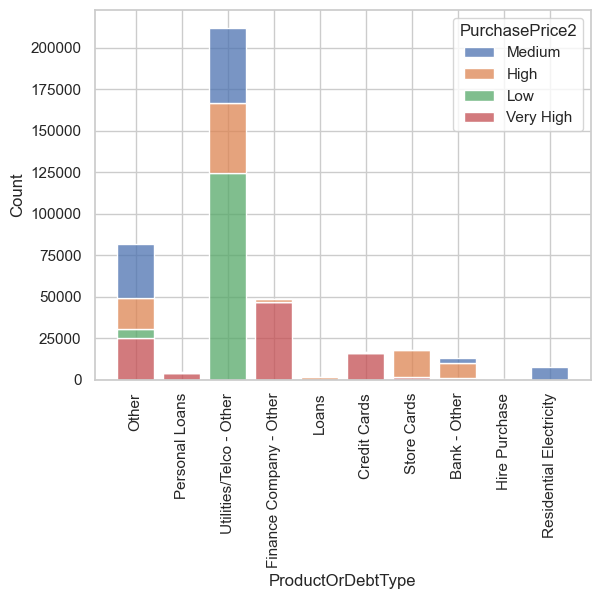

In [53]:
sns.histplot(data=df, x="ProductOrDebtType", hue="PurchasePrice2", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

### 20. PurchasePrice2 vs CollectionStatus

In [54]:
crosstab_result = pd.crosstab(columns=df['PurchasePrice2'], index=df['CollectionStatus'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)


print(formatted_crosstab)

PurchasePrice2         High     Low  Medium Very High
CollectionStatus                                     
ACTIVE               32.87%  25.28%  18.80%    23.05%
CANCELLED_WITHDRAWN  14.05%  39.96%  20.00%    25.99%
CLOSED               29.58%  15.44%  17.51%    37.47%
HOLDING               8.47%   5.08%   5.08%    81.36%
LEGAL                11.56%   6.83%   4.60%    77.00%
LEGAL_ARRANGEMENT     7.95%   4.55%   4.83%    82.67%
NON_COLLECTION        0.00%  93.67%   4.64%     1.69%
PAID_IN_FULL         24.15%  19.08%  27.77%    29.00%
PASSIVE               9.06%  50.52%  24.86%    15.56%
PENDING               0.00%   3.70%   0.00%    96.30%
SETTLED FOR LESS     21.56%  19.48%   7.27%    51.70%
UNDER_ARRANGEMENT    10.46%   3.96%   4.58%    81.01%
All                  22.50%  32.30%  22.01%    23.20%


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'PAID_IN_FULL'),
  Text(1, 0, 'CANCELLED_WITHDRAWN'),
  Text(2, 0, 'PASSIVE'),
  Text(3, 0, 'CLOSED'),
  Text(4, 0, 'ACTIVE'),
  Text(5, 0, 'SETTLED FOR LESS'),
  Text(6, 0, 'UNDER_ARRANGEMENT'),
  Text(7, 0, 'LEGAL'),
  Text(8, 0, 'LEGAL_ARRANGEMENT'),
  Text(9, 0, 'NON_COLLECTION'),
  Text(10, 0, 'HOLDING'),
  Text(11, 0, 'PENDING')])

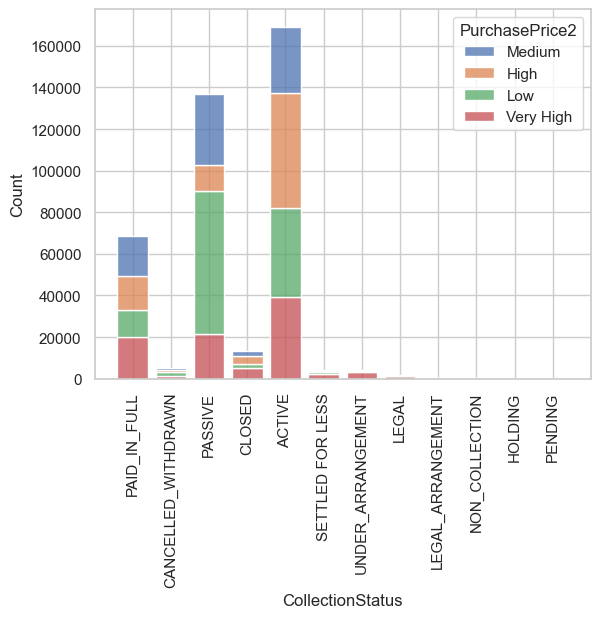

In [55]:
sns.histplot(data=df, x="CollectionStatus", hue="PurchasePrice2", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

### 21. ProductOrDebtType vs CollectionStatus

In [56]:
crosstab_result = pd.crosstab(columns=df['ProductOrDebtType'], index=df['CollectionStatus'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)


print(formatted_crosstab)

ProductOrDebtType   Bank - Other Credit Cards Finance Company - Other  \
CollectionStatus                                                        
ACTIVE                     5.95%        5.08%                  15.14%   
CANCELLED_WITHDRAWN        1.96%        5.40%                  17.30%   
CLOSED                     1.97%        7.96%                  17.57%   
HOLDING                    5.08%        3.39%                  76.27%   
LEGAL                      2.83%       14.78%                  37.98%   
LEGAL_ARRANGEMENT          1.99%       24.15%                  27.56%   
NON_COLLECTION             0.00%        0.00%                   1.27%   
PAID_IN_FULL               2.22%        5.90%                  18.05%   
PASSIVE                    0.44%        1.42%                   1.67%   
PENDING                    0.00%        0.00%                  96.30%   
SETTLED FOR LESS           6.52%       10.23%                  34.78%   
UNDER_ARRANGEMENT          3.06%        4.81%      

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Personal Loans'),
  Text(2, 0, 'Utilities/Telco - Other'),
  Text(3, 0, 'Finance Company - Other'),
  Text(4, 0, 'Loans'),
  Text(5, 0, 'Credit Cards'),
  Text(6, 0, 'Store Cards'),
  Text(7, 0, 'Bank - Other'),
  Text(8, 0, 'Hire Purchase'),
  Text(9, 0, 'Residential Electricity')])

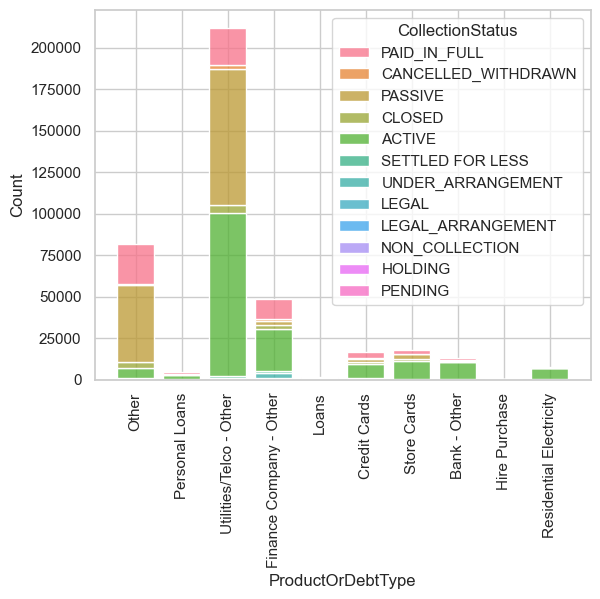

In [57]:
sns.histplot(data=df, x="ProductOrDebtType", hue="CollectionStatus", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

### 22. ProductOrDebtType vs PurchasePrice vs CollectionStatus

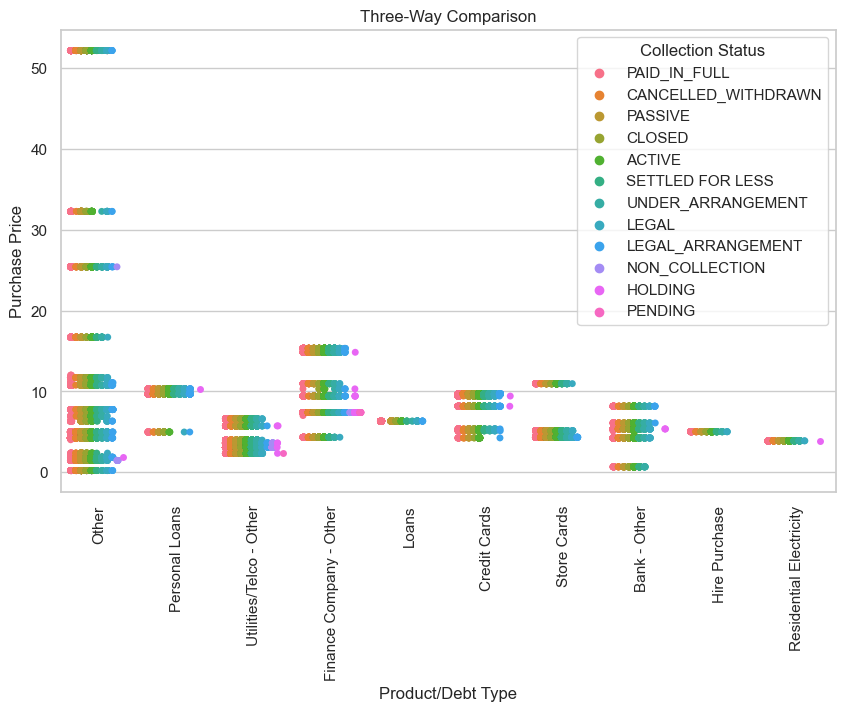

In [58]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="ProductOrDebtType", y="PurchasePrice", hue="CollectionStatus", data=df, jitter=True, dodge=True)

plt.xlabel("Product/Debt Type")
plt.ylabel("Purchase Price")
plt.title("Three-Way Comparison")

plt.legend(title="Collection Status")

plt.xticks(rotation=90)

plt.show()


### 23. Creating new variable - CollectionStatus2

In [59]:
# ND - not collectable debt
# D - collectable debt

Dict1 = {
    'PASSIVE': 'Type_1_ND',
    'PAID_IN_FULL': 'Type_1_ND',
    'CLOSED': 'Type_1_ND',
    'CANCELLED_WITHDRAWN': 'Type_1_ND',
    'SETTLED FOR LESS': 'Type_1_ND',
    'NON_COLLECTION': 'Type_1_ND',
    'ACTIVE': 'Type_2_D',
    'UNDER_ARRANGEMENT': 'Type_2_D',
    'LEGAL': 'Type_2_D',
    'LEGAL_ARRANGEMENT': 'Type_2_D',
    'HOLDING': 'Type_2_D',
    'PENDING': 'Type_2_D'
}
df['CollectionStatus2'] = df['CollectionStatus'].map(Dict1)

In [61]:
df['CollectionStatus2'].value_counts(normalize=True) * 100

Type_1_ND    56.531908
Type_2_D     43.468092
Name: CollectionStatus2, dtype: float64

In [62]:
crosstab_result = pd.crosstab(columns=df['CollectionStatus2'], index=df['PurchasePrice2'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

CollectionStatus2 Type_1_ND Type_2_D
PurchasePrice2                      
High                 38.02%   61.98%
Low                  66.95%   33.05%
Medium               63.85%   36.15%
Very High            53.04%   46.96%
All                  56.53%   43.47%


([0, 1, 2, 3],
 [Text(0, 0, 'Medium'),
  Text(1, 0, 'High'),
  Text(2, 0, 'Low'),
  Text(3, 0, 'Very High')])

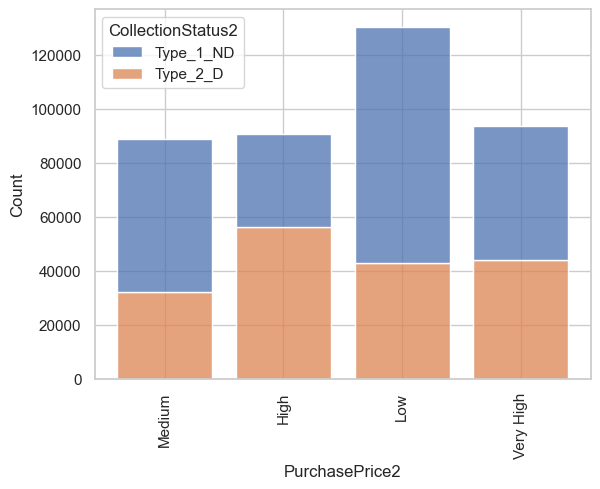

In [63]:
sns.histplot(data=df, x="PurchasePrice2", hue="CollectionStatus2", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

### 24. ProductOrDebtType vs CollectionStatus2

In [64]:
crosstab_result = pd.crosstab(columns=df['CollectionStatus2'], index=df['ProductOrDebtType'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

CollectionStatus2       Type_1_ND Type_2_D
ProductOrDebtType                         
Bank - Other               21.21%   78.79%
Credit Cards               45.97%   54.03%
Finance Company - Other    39.79%   60.21%
Hire Purchase              30.28%   69.72%
Loans                      89.84%   10.16%
Other                      91.65%    8.35%
Personal Loans             42.68%   57.32%
Residential Electricity    11.85%   88.15%
Store Cards                36.93%   63.07%
Utilities/Telco - Other    53.28%   46.72%
All                        56.53%   43.47%


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Personal Loans'),
  Text(2, 0, 'Utilities/Telco - Other'),
  Text(3, 0, 'Finance Company - Other'),
  Text(4, 0, 'Loans'),
  Text(5, 0, 'Credit Cards'),
  Text(6, 0, 'Store Cards'),
  Text(7, 0, 'Bank - Other'),
  Text(8, 0, 'Hire Purchase'),
  Text(9, 0, 'Residential Electricity')])

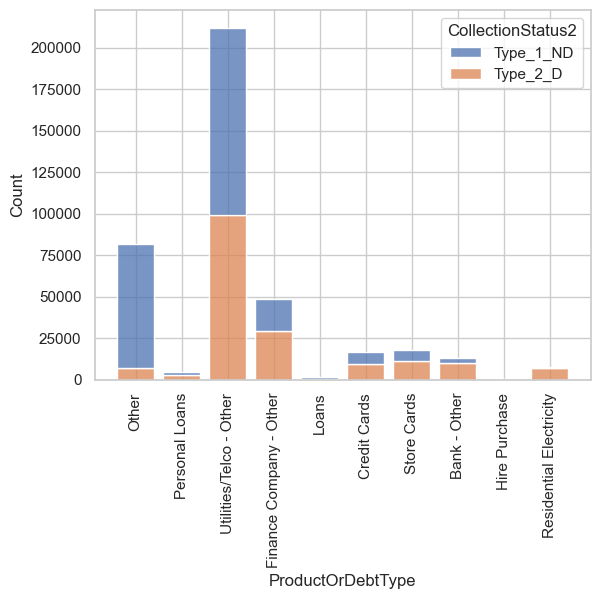

In [65]:
sns.histplot(data=df, x="ProductOrDebtType", hue="CollectionStatus2", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

In [66]:
df

,Debt_Pending,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,PurchasePrice2,CollectionStatus2
0,0.00,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,N,Y,1.0,53.000000,0,0,1,Medium,Type_1_ND
1,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,Y,N,N,1.0,45.730273,0,0,1,Medium,Type_1_ND
2,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,N,N,N,1.0,45.730273,1,0,1,Medium,Type_1_ND
3,8279.50,8279.50,8279.50,4.22,Other,PASSIVE,Y,N,N,1.0,45.730273,1,0,1,Medium,Type_1_ND
4,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,Y,N,Y,1.0,46.000000,2,0,1,Medium,Type_1_ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406418,448.20,448.20,448.20,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,36.000000,1,1,1,Very High,Type_2_D
406419,1678.37,1678.37,1678.37,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,37.000000,0,1,1,Very High,Type_2_D
406420,3512.60,3512.60,3512.60,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,71.000000,1,1,1,Very High,Type_2_D
406421,4477.31,4477.31,4477.31,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,38.000000,1,1,1,Very High,Type_2_D


In [67]:
df['CustomerAge'].value_counts()

45.730273     29067
38.000000     14133
37.000000     13672
39.000000     13241
36.000000     12682
              ...  
9.000000          1
7.000000          1
115.000000        1
132.000000        1
119.000000        1
Name: CustomerAge, Length: 119, dtype: int64

### 25. New feature Age_category

In [68]:
# creating new feature age_category

age_cat = []

for age in df['CustomerAge']:
    if 0<= age <= 19:
        cat = 'Teens'
    elif 20 <= age <= 30:
        cat = '20_30'
    elif 30 <= age < 45:
        cat = '31_44'
    elif 45 <= age < 60:
        cat = '45_59'
    else:
        cat = '60_^'
    age_cat.append(cat)

df['Age_category'] = age_cat

In [69]:
df.columns

Index(['Debt_Pending', 'DebtLoadPrincipal', 'BalanceAtDebtLoad',
       'PurchasePrice', 'ProductOrDebtType', 'CollectionStatus',
       'IsStatBarred', 'InBankruptcy', 'IsLegal', 'NumLiableParties',
       'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses',
       'PurchasePrice2', 'CollectionStatus2', 'Age_category'],
      dtype='object')

### 26. Age_category vs ProductOrDebtType

In [70]:
crosstab_result = pd.crosstab(columns=df['Age_category'], index=df['ProductOrDebtType'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

Age_category              20_30   31_44   45_59    60_^  Teens
ProductOrDebtType                                             
Bank - Other             20.12%  47.43%  25.53%   6.93%  0.00%
Credit Cards              9.48%  46.58%  28.39%  15.55%  0.01%
Finance Company - Other  20.20%  43.84%  26.78%   9.16%  0.02%
Hire Purchase             0.85%  33.48%  53.09%  12.58%  0.00%
Loans                     0.00%  66.00%  24.08%   9.92%  0.00%
Other                     7.15%  32.21%  43.99%  15.48%  1.17%
Personal Loans           10.04%  57.57%  23.49%   8.88%  0.02%
Residential Electricity  21.77%  47.81%  23.44%   6.97%  0.00%
Store Cards               1.25%  41.36%  38.68%  18.71%  0.00%
Utilities/Telco - Other   5.17%  41.16%  38.98%  14.68%  0.01%
All                       8.22%  40.48%  37.14%  13.91%  0.24%


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Personal Loans'),
  Text(2, 0, 'Utilities/Telco - Other'),
  Text(3, 0, 'Finance Company - Other'),
  Text(4, 0, 'Loans'),
  Text(5, 0, 'Credit Cards'),
  Text(6, 0, 'Store Cards'),
  Text(7, 0, 'Bank - Other'),
  Text(8, 0, 'Hire Purchase'),
  Text(9, 0, 'Residential Electricity')])

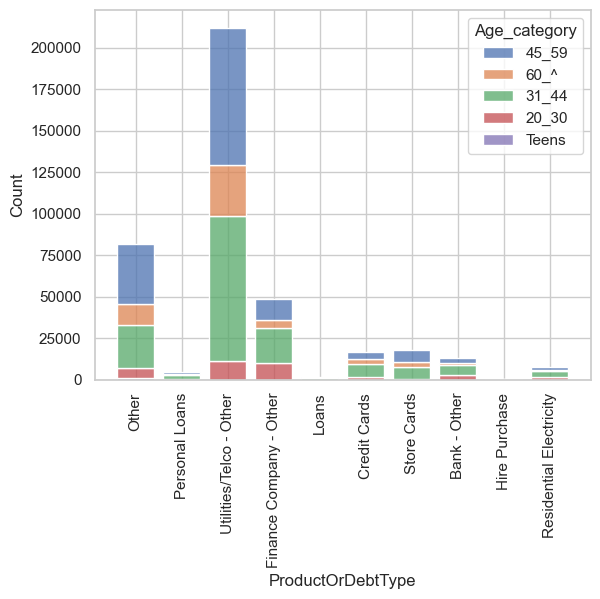

In [71]:
sns.histplot(data=df, x="ProductOrDebtType", hue="Age_category", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

### 27. Age_category vs CollectionStatus

In [72]:
crosstab_result = pd.crosstab(columns=df['Age_category'], index=df['CollectionStatus'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

Age_category          20_30   31_44   45_59    60_^  Teens
CollectionStatus                                          
ACTIVE               12.23%  47.76%  29.82%  10.18%  0.01%
CANCELLED_WITHDRAWN   2.97%  23.58%  58.06%  15.36%  0.02%
CLOSED                3.58%  38.27%  40.59%  17.56%  0.00%
HOLDING               6.78%  25.42%  37.29%  30.51%  0.00%
LEGAL                 6.50%  46.25%  34.95%  12.29%  0.00%
LEGAL_ARRANGEMENT     3.41%  33.52%  38.64%  24.43%  0.00%
NON_COLLECTION        0.00%  56.12%  39.24%   4.64%  0.00%
PAID_IN_FULL          9.04%  37.40%  35.91%  17.24%  0.40%
PASSIVE               3.05%  33.80%  46.07%  16.58%  0.50%
PENDING              37.04%  18.52%  37.04%   7.41%  0.00%
SETTLED FOR LESS     12.21%  43.38%  33.25%  11.16%  0.00%
UNDER_ARRANGEMENT    20.04%  37.73%  29.48%  12.69%  0.07%
All                   8.22%  40.48%  37.14%  13.91%  0.24%


In [73]:
crosstab_result = pd.crosstab(columns=df['Age_category'], index=df['CollectionStatus2'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

Age_category        20_30   31_44   45_59    60_^  Teens
CollectionStatus2                                       
Type_1_ND           5.05%  35.11%  42.72%  16.70%  0.42%
Type_2_D           12.35%  47.47%  29.88%  10.29%  0.01%
All                 8.22%  40.48%  37.14%  13.91%  0.24%


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'PAID_IN_FULL'),
  Text(1, 0, 'CANCELLED_WITHDRAWN'),
  Text(2, 0, 'PASSIVE'),
  Text(3, 0, 'CLOSED'),
  Text(4, 0, 'ACTIVE'),
  Text(5, 0, 'SETTLED FOR LESS'),
  Text(6, 0, 'UNDER_ARRANGEMENT'),
  Text(7, 0, 'LEGAL'),
  Text(8, 0, 'LEGAL_ARRANGEMENT'),
  Text(9, 0, 'NON_COLLECTION'),
  Text(10, 0, 'HOLDING'),
  Text(11, 0, 'PENDING')])

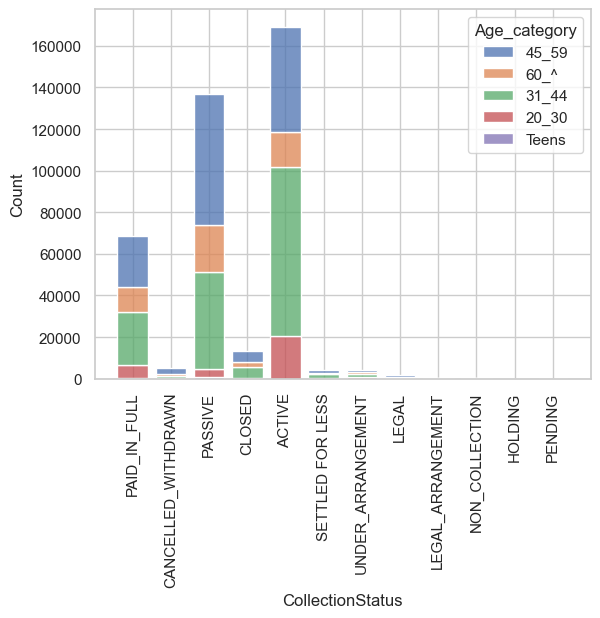

In [74]:
sns.histplot(data=df, x="CollectionStatus", hue="Age_category", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

([0, 1], [Text(0, 0, 'Type_1_ND'), Text(1, 0, 'Type_2_D')])

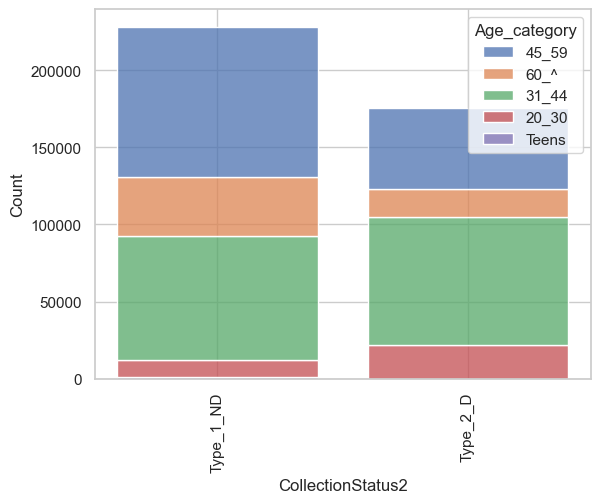

In [75]:
sns.histplot(data=df, x="CollectionStatus2", hue="Age_category", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

### 28. creating new feature Debt_Category

(0.0, 50000.0)

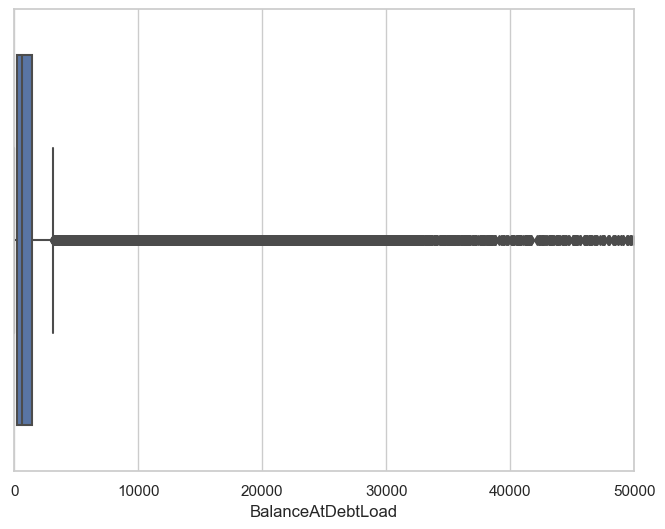

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='BalanceAtDebtLoad', data=df)
plt.xlim(0, 50000)

In [77]:
df.describe()

,Debt_Pending,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
count,403611.000000,403611.000000,403611.000000,403611.000000,403611.000000,403611.000000,403611.000000,403611.000000,403611.000000
mean,1260.411735,1478.954958,1541.214814,5.618327,1.016989,45.703975,0.435394,0.208872,0.846798
std,3914.782290,4235.174341,4356.976017,5.441413,0.132300,12.472030,0.714679,0.434953,0.460084
min,-7717.200000,0.010000,0.010000,0.190000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,85.000000,246.000000,248.960000,3.070000,1.000000,37.000000,0.000000,0.000000,1.000000
50%,454.860000,615.380000,626.930000,4.220000,1.000000,45.000000,0.000000,0.000000,1.000000
75%,1146.290000,1375.980000,1415.410000,6.590000,1.000000,53.000000,1.000000,0.000000,1.000000
max,441681.520000,844343.000000,844343.000000,52.180000,4.000000,133.000000,8.000000,5.000000,7.000000


In [78]:
# creating new feature Debt_category

debt_cat = []

for debt in df['BalanceAtDebtLoad']:
    if 0<= debt <= 249:
        cat = '25%_Q'
    elif 250 <= debt <= 627:
        cat = 'median'
    elif 628 <= debt < 1416:
        cat = '75%_Q'
    else:
        cat = 'High'
    debt_cat.append(cat)

df['Debt_category'] = debt_cat

In [79]:
df['Debt_category'].value_counts(normalize=True) * 100

High      25.107343
25%_Q     25.017901
75%_Q     24.957447
median    24.917309
Name: Debt_category, dtype: float64

### 30. Debt_cat vs age_category

In [80]:
crosstab_result = pd.crosstab(columns=df['Age_category'], index=df['Debt_category'], margins=True, normalize='index')

# Converting values to percentages and round to two decimal places
percentage_crosstab = crosstab_result * 100
rounded_percentage_crosstab = percentage_crosstab.round(2)

# Formatting the rounded percentage values as strings with '%' symbol
formatted_crosstab = rounded_percentage_crosstab.applymap("{:.2f}%".format)

print(formatted_crosstab)

Age_category   20_30   31_44   45_59    60_^  Teens
Debt_category                                      
25%_Q          8.01%  31.45%  41.89%  17.71%  0.95%
75%_Q          8.86%  46.06%  34.15%  10.92%  0.01%
High           8.47%  42.42%  35.67%  13.43%  0.01%
median         7.55%  42.02%  36.83%  13.59%  0.01%
All            8.22%  40.48%  37.14%  13.91%  0.24%


([0, 1, 2, 3],
 [Text(0, 0, '75%_Q'),
  Text(1, 0, '25%_Q'),
  Text(2, 0, 'median'),
  Text(3, 0, 'High')])

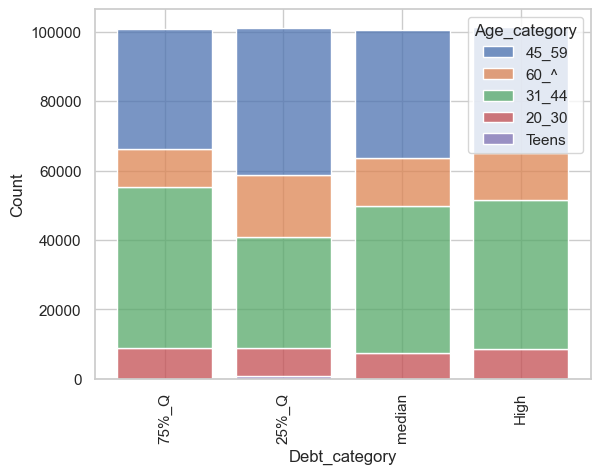

In [81]:
sns.histplot(data=df, x="Debt_category", hue="Age_category", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

### 31. Debt_cat vs Collection status

([0, 1, 2, 3],
 [Text(0, 0, '75%_Q'),
  Text(1, 0, '25%_Q'),
  Text(2, 0, 'median'),
  Text(3, 0, 'High')])

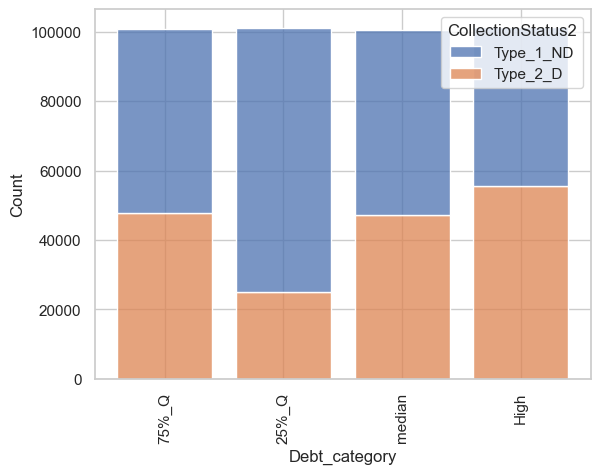

In [82]:
sns.histplot(data=df, x="Debt_category", hue="CollectionStatus2", multiple="stack", shrink=.8)
plt.xticks(rotation = 90)

In [83]:
df

,Debt_Pending,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,PurchasePrice2,CollectionStatus2,Age_category,Debt_category
0,0.00,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,N,Y,1.0,53.000000,0,0,1,Medium,Type_1_ND,45_59,75%_Q
1,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,Y,N,N,1.0,45.730273,0,0,1,Medium,Type_1_ND,45_59,25%_Q
2,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,N,N,N,1.0,45.730273,1,0,1,Medium,Type_1_ND,45_59,median
3,8279.50,8279.50,8279.50,4.22,Other,PASSIVE,Y,N,N,1.0,45.730273,1,0,1,Medium,Type_1_ND,45_59,High
4,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,Y,N,Y,1.0,46.000000,2,0,1,Medium,Type_1_ND,45_59,median
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406418,448.20,448.20,448.20,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,36.000000,1,1,1,Very High,Type_2_D,31_44,median
406419,1678.37,1678.37,1678.37,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,37.000000,0,1,1,Very High,Type_2_D,31_44,High
406420,3512.60,3512.60,3512.60,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,71.000000,1,1,1,Very High,Type_2_D,60_^,High
406421,4477.31,4477.31,4477.31,7.38,Finance Company - Other,ACTIVE,N,N,N,1.0,38.000000,1,1,1,Very High,Type_2_D,31_44,High


### Observations:

### PurchasePrice2 has four subcategories, with the following percentages: Low (32.30%), Very High (23.20%), High (22.50%), and Medium (22.01%).

1. **High-Potential Categories:**
   - **Credit Cards:** Given the high percentage (94.96%) in the "Very High" purchase price range, debt collection efforts for credit card-related accounts should be a top priority. The high purchase price range indicates that there's a strong likelihood of recovering debts from these accounts.

2. **Steady Performers:**
   - **Personal Loans:** With 97.56% falling into the "Very High" category, debt collection for personal loans is likely to be a consistent source of recovery. Focus on efficient strategies to collect debts from these accounts.

3. **Diversification Opportunities:**
   - **Utilities/Telco - Other:** Diversify debt collection efforts within this category, as it has a balanced distribution across purchase price categories. Explore strategies for recovering debts from a broader range of accounts within this category.

4. **Opportunities for Improvement:**
   - **Finance Company - Other:** The "Very High" percentage (95.67%) suggests that there are significant recovery opportunities within this category. Optimize debt collection strategies to improve recovery rates.

5. **Balanced Approach:**
   - **All Categories:** Maintain a balanced approach across all categories to address the entire spectrum of debt collection accounts. Although some categories may be more promising, it's essential not to neglect the others.



### PurchasePrice2 vs CollectionStatus

In the context of debt collection accounts, the distribution of "PurchasePrice2" categories across different collection statuses can provide insights into where to focus debt collection efforts.

1. **Active Accounts:**
   - "Very High" and "High" categories are significant (55.92% combined). Focus on active accounts falling into these categories for more efficient debt collection.

2. **Cancelled/Withdrawn Accounts:**
   - The distribution across categories is relatively balanced. Consider tailoring debt collection strategies for each category within this status.

3. **Closed Accounts:**
   - "Very High" accounts make up a substantial percentage (37.47%). Concentrate on optimizing debt collection strategies for closed accounts with "Very High" purchase prices.

4. **Holding Accounts:**
   - A large majority (89.83%) fall into the "Very High" and "High" categories. Prioritize debt collection efforts for holding accounts in these categories.

5. **Legal Accounts:**
   - Similar to holding accounts, a significant majority (88.56%) are in the "Very High" and "High" categories. Focus on legal accounts within these categories.

6. **Legal Arrangement Accounts:**
   - "Very High" accounts are predominant (82.67%). Optimize debt collection strategies for accounts in this category.

7. **Non-Collection Accounts:**
   - The majority (93.67%) falls into the "Low" category, indicating that these accounts may be challenging to collect on. Consider secondary strategies for these accounts.

8. **Paid in Full Accounts:**
   - Accounts are relatively evenly distributed across categories. Tailor debt collection strategies based on the individual account status within this category.

9. **Passive Accounts:**
   - Accounts predominantly fall into the "Low" category. Consider reviewing and improving strategies for collecting on passive accounts.

10. **Pending Accounts:**
    - "Very High" accounts make up a significant majority (96.30%). Concentrate on efficiently collecting on pending accounts within this category.

11. **Settled for Less Accounts:**
    - A considerable portion (51.70%) are in the "Very High" category. Optimize strategies for collecting on settled-for-less accounts in this category.

12. **Under Arrangement Accounts:**
    - A significant majority (91.47%) fall into the "Very High" and "High" categories. Prioritize debt collection efforts for accounts under arrangement in these categories.

### Collection Status vs product type

1. **ACTIVE Accounts:**
   - The majority of active accounts belong to the "Utilities/Telco - Other" (58.25%) category, indicating a focus on utility and telecom-related collections. A smaller proportion is in the "Finance Company - Other" (15.14%) category.

2. **CANCELLED/WITHDRAWN Accounts:**
   - These accounts are spread across various categories. While "Utilities/Telco - Other" (56.63%) is prominent, "Finance Company - Other" (17.30%) and "Other" (12.43%) categories also have a significant presence.

3. **CLOSED Accounts:**
   - "Utilities/Telco - Other" (32.80%) is the most common category for closed accounts, followed by "Finance Company - Other" (17.57%). There is also a notable presence of "Other" (25.97%) and "Personal Loans" (2.88%) categories.

4. **HOLDING Accounts:**
   - The majority of holding accounts belong to the "Finance Company - Other" (76.27%) category, indicating a concentration in this type of debt.

5. **LEGAL Accounts:**
   - Legal accounts have a prominent presence in the "Finance Company - Other" (37.98%) and "Other" (22.67%) categories. This suggests that legal accounts are associated with various types of debt.

6. **LEGAL ARRANGEMENT Accounts:**
   - These accounts are primarily in the "Other" (19.03%) and "Personal Loans" (18.47%) categories, indicating a diverse range of debt under legal arrangement.

7. **NON-COLLECTION Accounts:**
   - A significant majority of non-collection accounts (94.51%) are in the "Utilities/Telco - Other" category, which is expected since they are not actively pursued for collection.

8. **PAID IN FULL Accounts:**
   - "Other" (34.63%) and "Utilities/Telco - Other" (32.52%) are the dominant categories for paid-in-full accounts. These accounts may represent completed debt obligations.

9. **PASSIVE Accounts:**
   - Most passive accounts belong to the "Utilities/Telco - Other" (60.02%) category, with a smaller presence in "Other" (34.08%).

10. **PENDING Accounts:**
    - Pending accounts are overwhelmingly in the "Utilities/Telco - Other" (96.30%) category, indicating that they require attention related to utility and telecom debts.

11. **SETTLED FOR LESS Accounts:**
    - The "Utilities/Telco - Other" (28.11%) and "Finance Company - Other" (34.78%) categories are prominent among settled-for-less accounts.

12. **UNDER ARRANGEMENT Accounts:**
    - The majority of accounts under arrangement belong to the "Finance Company - Other" (69.34%) and "Utilities/Telco - Other" (9.37%) categories, suggesting diverse debt types under such arrangements.

### CollectionStatus2

- "Collection statuses in 'Type_1_ND' include accounts marked as 'PASSIVE', 'PAID_IN_FULL', 'CLOSED', 'CANCELLED_WITHDRAWN', 'SETTLED FOR LESS', 'NON_COLLECTION', while statuses in 'Type_2_D' include 'ACTIVE', 'UNDER_ARRANGEMENT', 'LEGAL', 'LEGAL_ARRANGEMENT', 'HOLDING', and 'PENDING'."

- Accounts categorized as 'Type_1_ND' (Not Collectable Debt) make up approximately 56.53% of the total.

- Accounts categorized as 'Type_2_D' (Collectable Debt) account for approximately 43.47% of the total.


- For the 'High' purchase price category:
   - 'Type_1_ND' (Not Collectable Debt) accounts make up 38.02%.
   - 'Type_2_D' (Collectable Debt) accounts make up 61.98% of the total.

- For the 'Low' purchase price category:
   - 'Type_1_ND' accounts constitute 66.95%.
   - 'Type_2_D' accounts constitute 33.05% of the total.

- For the 'Medium' purchase price category:
   - 'Type_1_ND' accounts represent 63.85%.
   - 'Type_2_D' accounts represent 36.15% of the total.

- For the 'Very High' purchase price category:
   - 'Type_1_ND' accounts make up 53.04%.
   - 'Type_2_D' accounts make up 46.96% of the total.

### Age_category

- The new feature "Age_category" is categorized based on the "CustomerAge" values as follows:

- If the age is between 0 and 19 (inclusive), it is categorized as 'Teens.'
- If the age is between 20 and 30 (inclusive), it is categorized as '20_30.'
- If the age is between 31 and 44 (inclusive), it is categorized as '31_44.'
- If the age is between 45 and 59 (inclusive), it is categorized as '45_59.'
- If the age is 60 or older, it is categorized as '60_^.'


1. **Teens (Age 0-19):**
   - There is a minimal presence of debt in the "Teens" category.
   - Focusing collection efforts on this age group may not be a priority due to the low debt volume.

2. **20-30 Age Group:**
   - This group has a noticeable presence in most collection statuses, particularly "ACTIVE" and "PENDING."
   - It might be beneficial to focus collection efforts on this age group as they have active accounts and accounts with pending status.

3. **31-44 Age Group:**
   - The "31-44" age group is prominent in various collection statuses, including "CANCELLED_WITHDRAWN," "LEGAL," and "LEGAL_ARRANGEMENT."
   - Consider tailoring collection strategies to address accounts in these statuses within this age group.

4. **45-59 Age Group:**
   - The "45-59" age group is significant in various collection statuses, including "CLOSED," "HOLDING," and "PASSIVE."
   - Focus collection efforts on accounts in these statuses within this age group.

5. **60 and Older (60_^):**
   - The "60^" age group has a presence in several collection statuses, including "HOLDING," "LEGAL," and "PENDING."
   - Collection efforts might be directed toward addressing accounts in these statuses within this age group.
   
   


1. **Type_1_ND (Not Collectable Debt):**
   - The "45-59" age group has the highest proportion (42.72%) of Type_1_ND debt, which is not collectable. Focusing collection efforts on this age group for Type_1_ND debt may not be a priority.
   - The "31-44" age group also has a significant proportion (35.11%) of Type_1_ND debt.
   - The "60_^" age group has a relatively high proportion (16.70%) of Type_1_ND debt.
   - The "Teens" age group has a small proportion (0.42%) of Type_1_ND debt.

2. **Type_2_D (Collectable Debt):**
   - The "31-44" age group has the highest proportion (47.47%) of Type_2_D debt, which is collectable. Focusing collection efforts on this age group for Type_2_D debt may be productive.
   - The "45-59" age group also has a substantial proportion (29.88%) of Type_2_D debt.
   - The "60_^" age group has a notable proportion (10.29%) of Type_2_D debt.
   - The "Teens" age group has a minimal proportion (0.01%) of Type_2_D debt.


### The "45-59" age category has the highest debt across all debt categories. In the provided data:

- In the "25%_Q" (Debt in the 25th Percentile) category, the "45-59" age category has the highest proportion of debt at 41.89%.
- In the "75%_Q" (Debt in the 75th Percentile) category, the "45-59" age category also has a substantial proportion of debt at 34.15%.
- In the "High" Debt category, the "45-59" age category has the highest proportion of debt at 35.67%.
- In the "Median" Debt category, the "45-59" age category has a significant proportion of debt at 36.83%.
